# May 10th

In [56]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler
import csv

In [57]:
print(tweepy.__version__)


3.10.0


In [58]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [59]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [60]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [61]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-10', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [62]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@Behnam_vlz @CallMeMatt Don't miss the thrill ...
1,@nftnow @AidiToken is project of the 2K22\nMor...
2,"For a reason, I was expecting a weekend pump a..."
3,📈 #Bitcoin $BTC Amount of Supply Last Active 5...
4,📊 Daily On-Chain Exchange Flow\n\n#Bitcoin $BT...
5,@Behnam_vlz @CallMeMatt Don't miss the thrill ...
6,📈 #Bitcoin $BTC Percent Supply Last Active 5+ ...
7,📈 #Bitcoin $BTC Amount of Supply Last Active 1...
8,@Behnam_vlz @CallMeMatt The OWNERSHIP RENOUNCE...
9,The latest #bitcoin block 718934 with 1140 tra...


In [63]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [64]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,@Behnam_vlz @CallMeMatt Don't miss the thrill ...
1,@nftnow @AidiToken is project of the 2K22\nMor...,@nftnow @AidiToken is project of the 2K22More ...
2,"For a reason, I was expecting a weekend pump a...","For a reason, I was expecting a weekend pump a..."
3,📈 #Bitcoin $BTC Amount of Supply Last Active 5...,📈 Bitcoin $BTC Amount of Supply Last Active 5y...
4,📊 Daily On-Chain Exchange Flow\n\n#Bitcoin $BT...,📊 Daily On-Chain Exchange FlowBitcoin $BTC➡️ ...


In [65]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,0.000000,0.000000
1,@nftnow @AidiToken is project of the 2K22\nMor...,@nftnow @AidiToken is project of the 2K22More ...,0.475000,0.175000
2,"For a reason, I was expecting a weekend pump a...","For a reason, I was expecting a weekend pump a...",1.000000,0.500000
3,📈 #Bitcoin $BTC Amount of Supply Last Active 5...,📈 Bitcoin $BTC Amount of Supply Last Active 5y...,0.436667,0.046667
4,📊 Daily On-Chain Exchange Flow\n\n#Bitcoin $BT...,📊 Daily On-Chain Exchange FlowBitcoin $BTC➡️ ...,0.000000,0.000000
5,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,0.000000,0.000000
6,📈 #Bitcoin $BTC Percent Supply Last Active 5+ ...,📈 Bitcoin $BTC Percent Supply Last Active 5+ Y...,0.333333,-0.066667
7,📈 #Bitcoin $BTC Amount of Supply Last Active 1...,📈 Bitcoin $BTC Amount of Supply Last Active 1m...,0.436667,0.046667
8,@Behnam_vlz @CallMeMatt The OWNERSHIP RENOUNCE...,@Behnam_vlz @CallMeMatt The OWNERSHIP RENOUNCE...,0.866667,0.666667
9,The latest #bitcoin block 718934 with 1140 tra...,The latest bitcoin block 718934 with 1140 tran...,0.900000,0.500000


In [66]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [67]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,0.000000,0.000000,Neutral
1,@nftnow @AidiToken is project of the 2K22\nMor...,@nftnow @AidiToken is project of the 2K22More ...,0.475000,0.175000,Positive
2,"For a reason, I was expecting a weekend pump a...","For a reason, I was expecting a weekend pump a...",1.000000,0.500000,Positive
3,📈 #Bitcoin $BTC Amount of Supply Last Active 5...,📈 Bitcoin $BTC Amount of Supply Last Active 5y...,0.436667,0.046667,Positive
4,📊 Daily On-Chain Exchange Flow\n\n#Bitcoin $BT...,📊 Daily On-Chain Exchange FlowBitcoin $BTC➡️ ...,0.000000,0.000000,Neutral
5,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,@Behnam_vlz @CallMeMatt Don't miss the thrill ...,0.000000,0.000000,Neutral
6,📈 #Bitcoin $BTC Percent Supply Last Active 5+ ...,📈 Bitcoin $BTC Percent Supply Last Active 5+ Y...,0.333333,-0.066667,Negative
7,📈 #Bitcoin $BTC Amount of Supply Last Active 1...,📈 Bitcoin $BTC Amount of Supply Last Active 1m...,0.436667,0.046667,Positive
8,@Behnam_vlz @CallMeMatt The OWNERSHIP RENOUNCE...,@Behnam_vlz @CallMeMatt The OWNERSHIP RENOUNCE...,0.866667,0.666667,Positive
9,The latest #bitcoin block 718934 with 1140 tra...,The latest bitcoin block 718934 with 1140 tran...,0.900000,0.500000,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


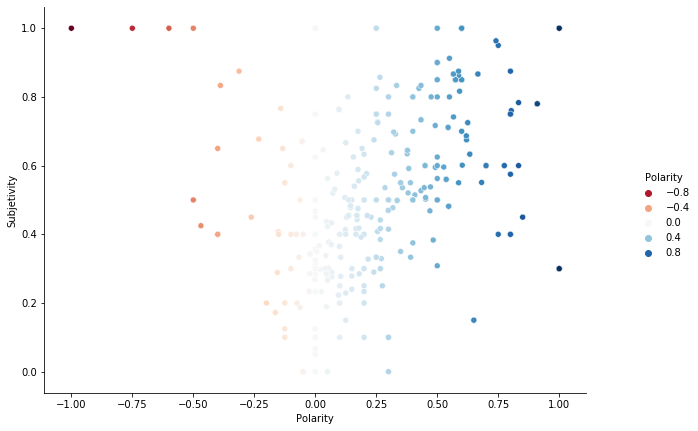

In [68]:
import seaborn as sns

ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

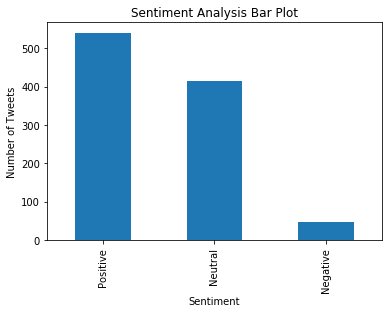

In [69]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [70]:
df['Sentiment'].value_counts()

Positive    540
Neutral     414
Negative     46
Name: Sentiment, dtype: int64

In [71]:
lst_df = list(df['Sentiment'].value_counts())

In [72]:
header = ['Sentiment', 'Positive', 'Neutral', 'Negative']
with open('f_sentiments.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    # write the header
    writer.writerow(header)


In [73]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[0, 'Sentiment'] = 'day 1'
dfs.loc[0, 'Positive'] = lst_df[0]
dfs.loc[0, 'Neutral'] = lst_df[1]
dfs.loc[0, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

  Sentiment Positive Neutral Negative
0     day 1      540     414       46


In [74]:
# 786     524      144